<a href="https://colab.research.google.com/github/jjoesten/MachineLearningForHealthcareAnalytics/blob/master/Breast_Cancer_Detection_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

### Data

In [0]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'normal_nucleoli', 'misoses', 'class']
df = pd.read_csv(url, names=names)

# Drop id column
df.drop(['id'], axis=1, inplace=True)

### Preprocessing

In [41]:
# Preprocessing

# Determine unique values
for i in names[1:len(names)]:
  print("{}: {}".format(i, df[i].unique()))
  
# Replace ? in bare_nuclei
df.replace('?', -99999, inplace=True)

print(df.shape)

df.describe()

clump_thickness: [ 5  3  6  4  8  1  2  7 10  9]
uniform_cell_size: [ 1  4  8 10  2  3  7  5  6  9]
uniform_cell_shape: [ 1  4  8 10  2  3  5  6  7  9]
marginal_adhesion: [ 1  5  3  8 10  4  6  2  9  7]
single_epithelial_size: [ 2  7  3  1  6  4  5  8 10  9]
bare_nuclei: ['1' '10' '2' '4' '3' '9' '7' -99999 '5' '8' '6']
bland_chromatin: [ 3  9  1  2  4  5  7  8  6 10]
normal_nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
misoses: [ 1  5  4  2  3  7 10  8  6]
class: [2 4]
(699, 10)


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,misoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Data Visualization

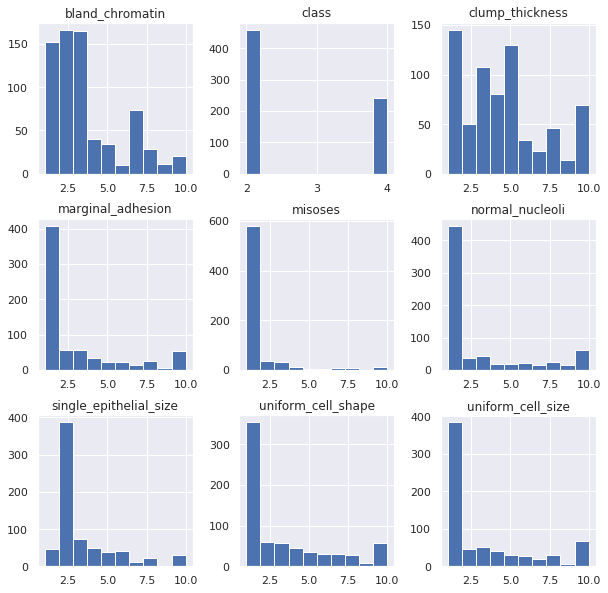

In [45]:
# histogram per variable
df.hist(figsize=(10,10))
plt.show()

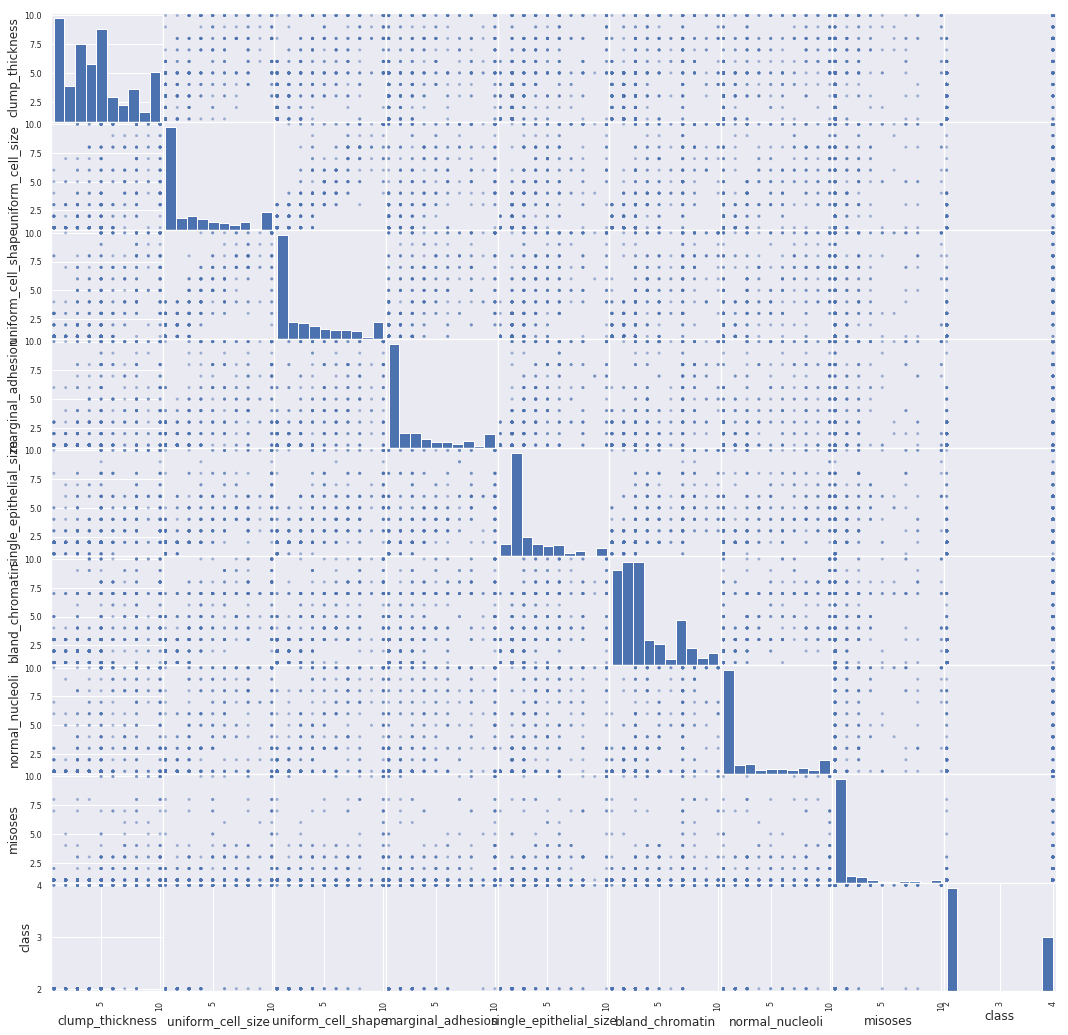

In [46]:
# Scatter Plot Matrix
scatter_matrix(df, figsize=(18,18))
plt.show()

In [0]:
# Create X and y datasets
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [0]:
seed = 8
scoring = 'accuracy'

In [50]:
# Define model
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, y_train,
                                               cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.973149 (0.012029)
SVM: 0.958831 (0.026594)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [53]:
# Make predictions on validation dataset

for name, model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test, predictions))
  print(classification_report(y_test, predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       103
           4       0.97      0.92      0.94        37

    accuracy                           0.97       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.97      0.97      0.97       140

SVM
0.95
              precision    recall  f1-score   support

           2       0.99      0.94      0.97       103
           4       0.86      0.97      0.91        37

    accuracy                           0.95       140
   macro avg       0.92      0.96      0.94       140
weighted avg       0.95      0.95      0.95       140



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
clf = SVC()

clf.fit